<a href="https://colab.research.google.com/github/himanshij19/satellite-image-classification/blob/main/satellite-image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'/content/drive/MyDrive/NN-project/archive/data/cloudy' : 'Cloudy',
          '/content/drive/MyDrive/NN-project/archive/data/desert' : 'Desert',
          '/content/drive/MyDrive/NN-project/archive/data/green_area' : 'Green_Area',
          '/content/drive/MyDrive/NN-project/archive/data/water' : 'Water',
           }

In [ ]:
# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        # Use .concat instead of .append
        data = pd.concat([data, pd.DataFrame({'image_path': [image_path], 'label': [label]})], ignore_index=True)

In [ ]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [ ]:
!pip install keras --upgrade
# The ImageDataGenerator class was moved from keras.preprocessing.image to keras.utils.image_dataset
# Make sure to restart the kernel after installation!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import image_dataset_from_directory # Import from keras.utils.image_dataset
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
# Load the dataset
df = pd.read_csv("image_dataset.csv")

In [ ]:
df

,image_path,label
0,/content/drive/MyDrive/NN-project/archive/data...,Cloudy
1,/content/drive/MyDrive/NN-project/archive/data...,Cloudy
2,/content/drive/MyDrive/NN-project/archive/data...,Cloudy
3,/content/drive/MyDrive/NN-project/archive/data...,Cloudy
4,/content/drive/MyDrive/NN-project/archive/data...,Cloudy
...,...,...
5646,/content/drive/MyDrive/NN-project/archive/data...,Water
5647,/content/drive/MyDrive/NN-project/archive/data...,Water
5648,/content/drive/MyDrive/NN-project/archive/data...,Water
5649,/content/drive/MyDrive/NN-project/archive/data...,Water


In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Import the necessary modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Check that 'image_path' and 'label' columns exist in train_df and test_df
assert 'image_path' in train_df.columns, "'image_path' column missing in train_df"
assert 'label' in train_df.columns, "'label' column missing in train_df"
assert 'image_path' in test_df.columns, "'image_path' column missing in test_df"
assert 'label' in test_df.columns, "'label' column missing in test_df"

# Generate the training data
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

# Generate the test data
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")


Found 4520 validated image filenames belonging to 4 classes.
Found 1131 validated image filenames belonging to 4 classes.


In [ ]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Use model.fit instead of model.fit_generator
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 1892s 13s/step - accuracy: 0.5486 - loss: 1.0513 - val_accuracy: 0.7330 - val_loss: 0.5565
Epoch 2/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1453s 10s/step - accuracy: 0.7834 - loss: 0.4954 - val_accuracy: 0.8612 - val_loss: 0.3087
Epoch 3/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1329s 9s/step - accuracy: 0.8362 - loss: 0.3873 - val_accuracy: 0.7798 - val_loss: 0.4672
Epoch 4/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1328s 9s/step - accuracy: 0.7881 - loss: 0.5008 - val_accuracy: 0.8895 - val_loss: 0.3173
Epoch 5/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1340s 9s/step - accuracy: 0.8453 - loss: 0.4101 - val_accuracy: 0.8444 - val_loss: 0.3308


In [ ]:
num_samples = test_df.shape[0]
num_samples

1131

In [ ]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8410 - loss: 0.3370


In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

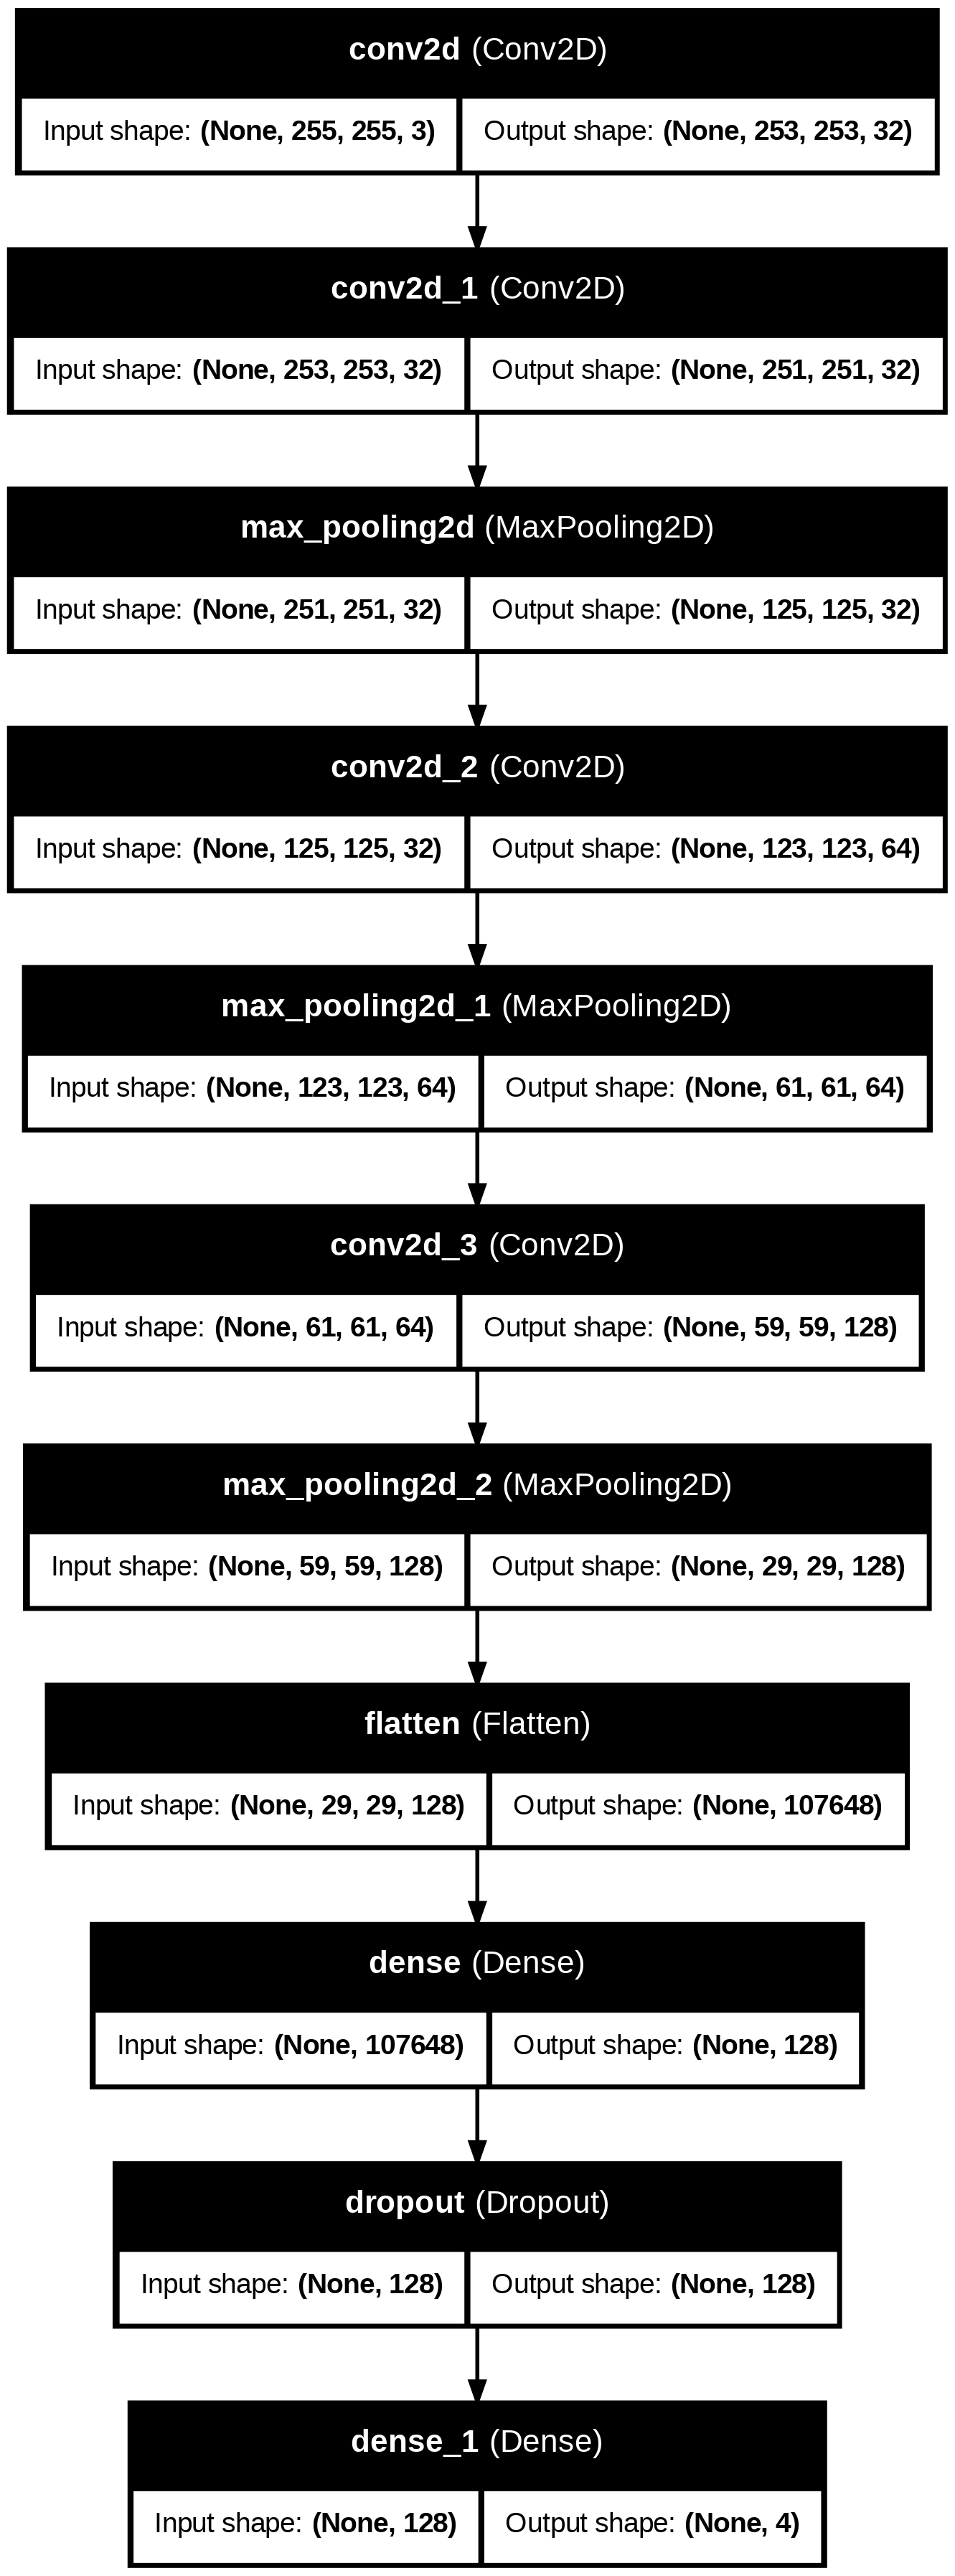

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

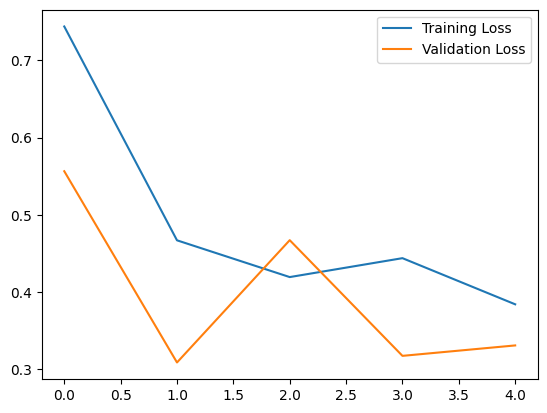

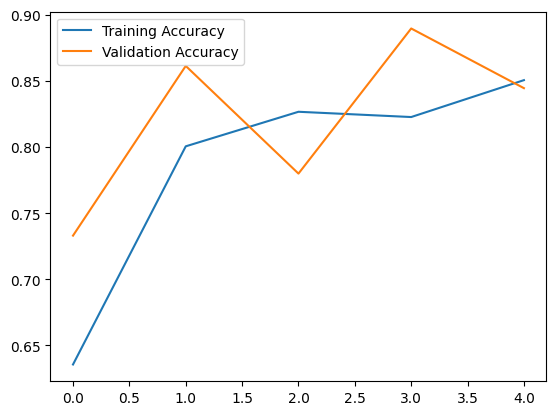

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

In [ ]:
# Load the model
model = load_model("Model.h5")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [ ]:
# Load an image from the test set
img = load_img("/content/drive/MyDrive/NN-project/archive/data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [ ]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [ ]:
img_array.shape

(255, 255, 3)

In [ ]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [ ]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [ ]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


In [ ]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
predictions = model.predict(test_generator)

36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step


In [ ]:
predictions

array([[6.8643875e-04, 6.3938905e-06, 7.9652411e-01, 2.0278306e-01],
       [3.7939649e-04, 3.2263601e-06, 3.8481053e-02, 9.6113640e-01],
       [5.6260873e-02, 9.4373906e-01, 4.3246975e-14, 2.0220718e-14],
       ...,
       [1.4265868e-01, 8.5734129e-01, 1.9314417e-10, 3.0241587e-10],
       [9.8952711e-01, 8.9609800e-03, 1.3267892e-06, 1.5105518e-03],
       [1.0463600e-04, 1.5745728e-06, 5.1625580e-01, 4.8363799e-01]],
      dtype=float32)

In [ ]:
actual_labels = test_generator.classes

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([2, 3, 1, ..., 1, 0, 2])

In [ ]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [ ]:
print(cm)

[[ 81  75 101  74]
 [ 55  55  66  54]
 [ 72  60  91  57]
 [ 91  68  66  65]]


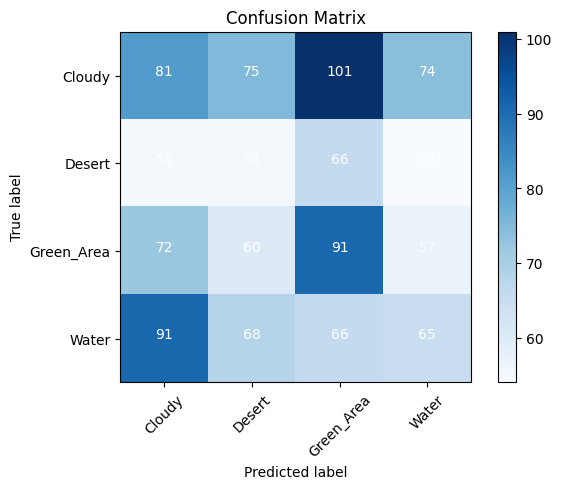

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
from io import BytesIO
import requests
from tensorflow.keras.preprocessing import image
import numpy as np
import tempfile

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

url_list = ['https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg',
            'https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=crop',
            'https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000',
            'https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg',
           ]


for url in url_list:
    response = requests.get(url)
    with tempfile.NamedTemporaryFile(mode='wb') as f:
        f.write(response.content)
        f.seek(0)
        img = image.load_img(f.name, target_size=(255, 255))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)

        classes = model.predict(img, batch_size=10)
        class_index = np.argmax(classes[0])
        predicted_label = class_names[class_index]
        print(url + "The image is predicted to be '{}'.".format(predicted_label))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpgThe image is predicted to be 'Desert'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=cropThe image is predicted to be 'Water'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000The image is predicted to be 'Cloudy'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpgThe image is predicted to be 'Desert'.


In [ ]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(255, 255, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
num_classes = len(class_names) # Get the number of classes from the class_names list
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Use ImageDataGenerator to load and augment the data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, x_col='image_path', y_col='label', target_size=(255, 255), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, x_col='image_path', y_col='label', target_size=(255, 255), batch_size=32, class_mode='categorical')

# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

# Save the model
model.save("resnet50_satellite.h5")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 255, 255, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 261, 261, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,689,988 (98.00 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 4520 validated image filenames belonging to 4 classes.
Found 1131 validated image filenames belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 1409s 10s/step - accuracy: 0.2600 - loss: 1.6600 - val_accuracy: 0.4898 - val_loss: 1.2878
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1381s 10s/step - accuracy: 0.3599 - loss: 1.3135 - val_accuracy: 0.5305 - val_loss: 1.1928
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1398s 10s/step - accuracy: 0.4608 - loss: 1.1589 - val_accuracy: 0.5358 - val_loss: 1.0043
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1414s 10s/step - accuracy: 0.4978 - loss: 0.9992 - val_accuracy: 0.5968 - val_loss: 0.8454
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1386s 10s/step - accuracy: 0.5448 - loss: 0.8472 - val_accuracy: 0.6746 - val_loss: 0.7625
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1397s 10s/step - accuracy: 0.5529 - loss: 0.7986 - val_accuracy: 0.6004 - val_loss: 0.8005
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1411s 10s/step - accuracy: 0.5866 - loss: 0.7603 - val_accuracy: 0.6622 - val_loss: 0.7132
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1384s 10s/step - accuracy: 0.5798 - loss: 0.7515 - val